In [330]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic
import geopandas as gpd

data = pd.read_csv('adult.data',names=data_types,index_col=None,na_values=" ?",comment='|')
data = data.drop('fnlwgt', axis=1)
df = pd.DataFrame(data).drop_duplicates()

df.head()


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


[]

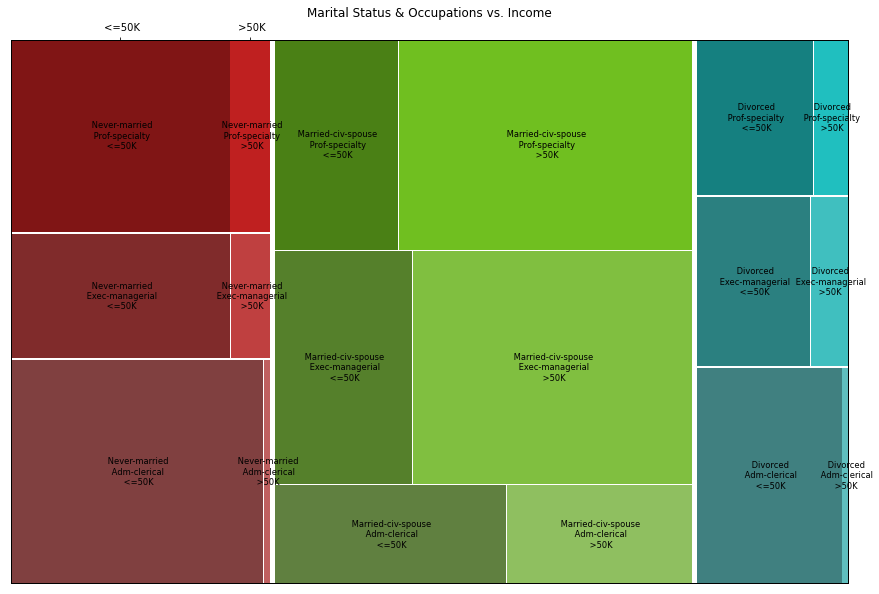

In [331]:
ms_top = df['marital_status'].value_counts()
occ_top = df['occupation'].value_counts()
ms_lis =[]
occ_lis =[]
for i in range(3):
    ms_lis.append(ms_top.keys()[i])
    occ_lis.append(occ_top.keys()[i])
    
ms_df = df[df['occupation'].isin(occ_lis) & df['marital_status'].isin(ms_lis)]

fig, ax = plt.subplots(figsize=(15, 10))
mosaic(ms_df, ['marital_status', 'occupation','income'],ax=ax)
plt.title('Marital Status & Occupations vs. Income')
ax.set_xticks([])
ax.set_yticks([])


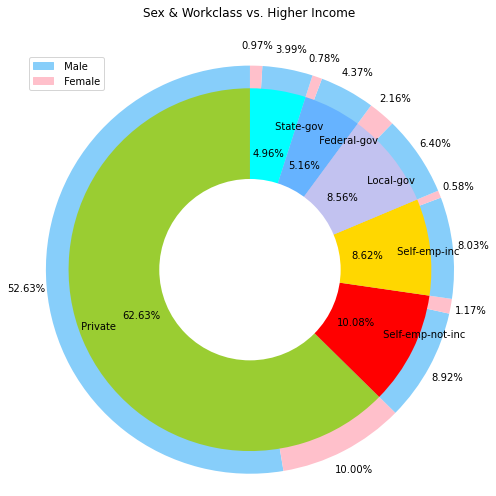

In [308]:
workclass_hi = df.loc[(df.income == " >50K"),["workclass"]].value_counts()
workclass_hi = workclass_hi[workclass_hi != 0]
labels = []
for i in workclass_hi.keys():
    labels.append(i[0])
sex_ = [' Male',' Female']
sizes = []
for i in labels:
    values = df.loc[(df.income == " >50K") & (df.workclass == i),['sex']].value_counts()
    sizes.append(values[0])
    sizes.append(values[1])

colors = ['yellowgreen','red','gold','#c2c2f0','#66b3ff','cyan','grey','purple',]
colors_g = ['lightskyblue','pink']
colors_gender = colors_g*6
def my_autopct(pct):
    return '{:.2f}%'.format(pct) if pct > 0 else ''
fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(sizes,colors=colors_gender,startangle=90, radius=2.25,autopct=my_autopct, pctdistance=1.1)
plt.pie(workclass_hi, labels=labels, labeldistance = 0.8, colors=colors, startangle=90,frame=True, radius=2, autopct=my_autopct, pctdistance=0.65)
ax.legend(labels, loc='center right')
legend_patches = [mpatches.Patch(color=c, label=l) for c, l in zip(colors_g, sex_)]
ax.legend(handles=legend_patches, loc='upper left')
centre_circle = plt.Circle((0,0),1,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.set_title('Sex & Workclass vs. Higher Income\n\n')
plt.axis('equal')
plt.tight_layout()
plt.show()

/Users/lucydesu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


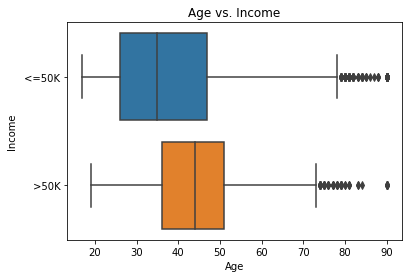

In [309]:
#age - box
sns.boxplot(df['age'],df['income'])
plt.ylabel('Income')
plt.xlabel('Age')
plt.title('Age vs. Income')
plt.show()


In [310]:
# workclass_hi = df.loc[(df.income == " >50K") & (df.sex == " Male"),["workclass"]].value_counts()
# labels = []
# for i in workclass_hi.keys():
#     labels.append(i[0])
# colors = ['yellowgreen','red','gold','lightskyblue','pink','cyan','grey','purple',]
# fig, ax = plt.subplots(figsize=(6, 6))
# wedges, _, _ = ax.pie(workclass_hi, labels=None, autopct='%.2f%%', colors=colors)
# ax.set_title('Male Workclass vs. Higher Income')
# ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# ax.set(aspect="equal")
# plt.show()

# workclass_li = df.loc[(df.income == " >50K")&(df.sex == " Female"),["workclass"]].value_counts()
# labels = []
# for i in workclass_li.keys():
#     labels.append(i[0])
# fig, ax = plt.subplots(figsize=(6, 6))
# wedges, _, _ = ax.pie(workclass_li, labels=None, autopct='%.2f%%', colors=colors)
# ax.set_title('Female Workclass vs. Higher Income')
# ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# ax.set(aspect="equal")
# plt.show()


/Users/lucydesu/opt/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


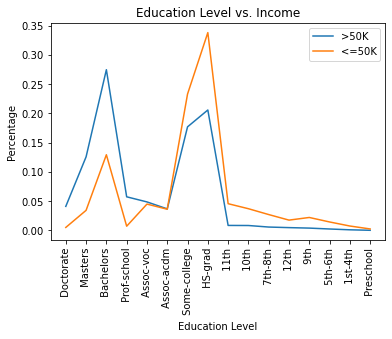

In [311]:
# education - line
education_hi = df.loc[(df.income == " >50K"),["education"]].value_counts()
education_li = df.loc[(df.income == " <=50K"),["education"]].value_counts()
labels = [' Doctorate',' Masters', ' Bachelors', ' Prof-school', ' Assoc-voc',  ' Assoc-acdm', ' Some-college',' HS-grad', ' 11th', ' 10th', ' 7th-8th', ' 12th', ' 9th', ' 5th-6th', ' 1st-4th', ' Preschool']
edu_hi_percent = [0] * len(labels)
edu_li_percent = [0] * len(labels)
for i in range(len(labels)):
    if labels[i] in education_hi:
        edu_hi_percent[i] = education_hi[labels[i]]/education_hi.sum()
    if labels[i] in education_li:
        edu_li_percent[i] = education_li[labels[i]]/education_li.sum()

plt.plot(labels, edu_hi_percent, label='>50K')
plt.plot(labels, edu_li_percent, label='<=50K')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Education Level vs. Income')
plt.xticks(rotation=90)
plt.legend()
plt.show()

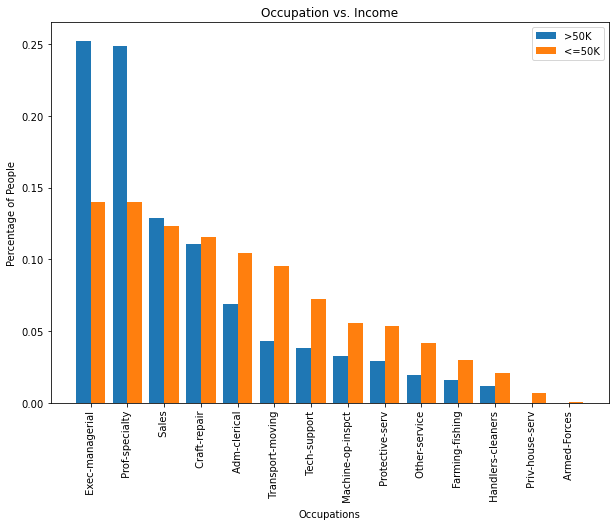

In [312]:
# occupation - bar
occupation_hi = df.loc[(df.income == " >50K"),["occupation"]].value_counts()
occupation_li = df.loc[(df.income == " <=50K"),["occupation"]].value_counts()
occupation_labels = occupation_hi.keys()
labels = []
for i in occupation_labels:
    labels.append(i[0])
    
occ_hi_sum = occupation_hi.sum()
occ_li_sum = occupation_li.sum()
occ_hi = []
for i in occupation_hi:
    occ_hi.append(i/occ_hi_sum)
occ_li = []
for i in occupation_li:
    occ_li.append(i/occ_li_sum)

xpos = np.arange(len(labels))
plt.figure(figsize=(10,7))
barwidth = 0.4
plt.bar(xpos-0.2,occ_hi, width = barwidth, label='>50K')
plt.bar(xpos+0.2,occ_li, width = barwidth, label='<=50K')
plt.xticks(xpos, labels,rotation='vertical')
plt.xlabel('Occupations')
plt.ylabel('Percentage of People')
plt.title('Occupation vs. Income')
plt.legend()
plt.show()


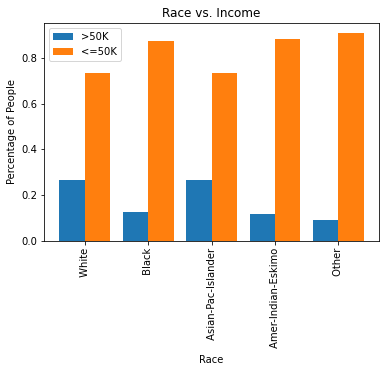

In [313]:
# race - pie
race_hi = df.loc[(df.income == " >50K"),["race"]].value_counts()
race_li = df.loc[(df.income == " <=50K"),["race"]].value_counts()
race_labels = race_hi.keys()
labels = []
for i in race_labels:
    labels.append(i[0])
    
races_hi = []
races_li = []
for i in labels:
    races_hi.append((race_hi[i]/(race_hi[i]+race_li[i]))[0])
    races_li.append((race_li[i]/(race_hi[i]+race_li[i]))[0])

xpos = np.arange(len(labels))
barwidth = 0.4
plt.bar(xpos-0.2,races_hi, width = barwidth, label='>50K')
plt.bar(xpos+0.2,races_li, width = barwidth, label='<=50K')
plt.xticks(xpos, labels,rotation='vertical')
plt.xlabel('Race')
plt.ylabel('Percentage of People')
plt.title('Race vs. Income')
plt.legend()
plt.show()

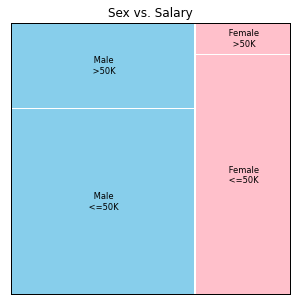

In [314]:
# sex - mosaic
sex =  df[["sex","income"]]
fig, ax = plt.subplots(figsize=(5, 5))
mosaic(sex, ['sex', 'income'],ax=ax, properties=lambda key: {'facecolor': 'skyblue' if key[0] == ' Male' else 'pink'})
plt.title('Sex vs. Salary')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

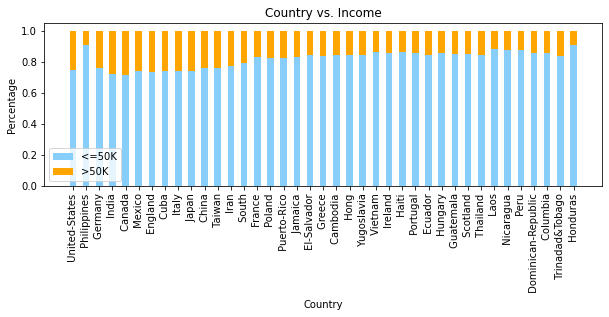

In [315]:
# country 
country_hi = df.loc[(df.income == " >50K"),["country"]].value_counts()
country_li = df.loc[(df.income == " <=50K"),["country"]].value_counts()
country_labels = country_hi.keys()
labels = []
for i in country_labels:
    labels.append(i[0])
    
country_hi_v = []
country_li_v = []
for i in range(len(country_hi)):
    country_sum = country_hi[i] + country_li[i]
    country_hi_v.append(country_hi[i]/country_sum)
    country_li_v.append(country_li[i]/country_sum)

xpos = np.arange(len(labels))
plt.figure(figsize=(10,3))
barwidth = 0.5

plt.bar(xpos,country_li_v, width = barwidth, label='<=50K',color='lightskyblue')
plt.bar(xpos,country_hi_v, bottom = country_li_v,width = barwidth, label='>50K',color='orange')
plt.xticks(xpos, labels,rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Country vs. Income')
plt.legend()
plt.show()


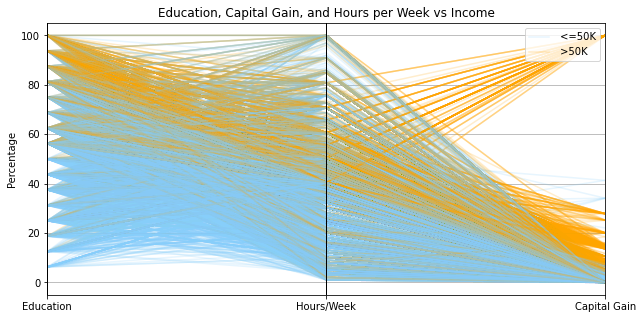

In [196]:
df['education_num_percentage'] = df['education_num'] / df['education_num'].max() * 100
df['hours_per_week_percentage'] = df['hours_per_week'] / df['hours_per_week'].max() * 100
df['capital_gain_percentage'] = df['capital_gain'] / df['capital_gain'].max() * 100

coord = df[['education_num_percentage', 'hours_per_week_percentage', 'capital_gain_percentage','income']]
plt.figure(figsize=(10, 5))
ax= pd.plotting.parallel_coordinates(coord, 'income', alpha=0.2, color=['lightskyblue','orange'])
ax.set_xticklabels(['Education', 'Hours/Week', 'Capital Gain'])

plt.ylabel('Percentage')
plt.title('Education, Capital Gain, and Hours per Week vs Income')
plt.show()

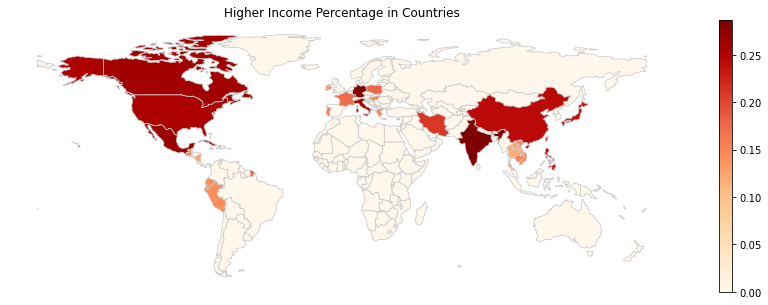

In [316]:
country_hi = df.loc[(df.income == " >50K"),["country"]].value_counts()
country_li = df.loc[(df.income == " <=50K"),["country"]].value_counts()
country_labels = country_hi.keys()
labels = []
for i in country_labels:
    if i[0] == " United-States":
        labels.append('United States of America')
    labels.append(i[0].strip())
    
country_hi_v = []
for i in range(len(country_hi)):
    country_sum = country_hi[i] + country_li[i]
    country_hi_v.append(country_hi[i]/country_sum)

geodf = pd.DataFrame(list(zip(labels, country_hi_v)),columns=['country','percent'])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
merged_data = world.merge(geodf, how='left', left_on='name', right_on='country')
merged_data['percent'] = merged_data['percent'].apply(lambda x: x if not pd.isna(x) else 0)
fig, ax = plt.subplots(figsize=(15, 5))
merged_data.plot(column='percent',legend=True, cmap='OrRd', linewidth=0.8, edgecolor='0.8', ax=ax)
plt.axis("off")
plt.title('Higher Income Percentage in Countries')
plt.show()